___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# K Means Clustering Project 

For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

___
It is **very important to note, we actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.** 

When using the Kmeans algorithm under normal circumstances, it is because you don't have labels. In this case we will use the labels to try to get an idea of how well the algorithm performed, but you won't usually do this for Kmeans, so the classification report and confusion matrix at the end of this project, don't truly make sense in a real world setting!.
___

## The Data

We will use a data frame with 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

## Import Libraries

** Import the libraries you usually use for data analysis.**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

** Read in the College_Data file using read_csv. Figure out how to set the first column as the index.**

In [6]:
df = pd.read_csv('College_data').head()

**Check the head of the data**

In [7]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


** Check the info() and describe() methods on the data.**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   5 non-null      object 
 1   Private      5 non-null      object 
 2   Apps         5 non-null      int64  
 3   Accept       5 non-null      int64  
 4   Enroll       5 non-null      int64  
 5   Top10perc    5 non-null      int64  
 6   Top25perc    5 non-null      int64  
 7   F.Undergrad  5 non-null      int64  
 8   P.Undergrad  5 non-null      int64  
 9   Outstate     5 non-null      int64  
 10  Room.Board   5 non-null      int64  
 11  Books        5 non-null      int64  
 12  Personal     5 non-null      int64  
 13  PhD          5 non-null      int64  
 14  Terminal     5 non-null      int64  
 15  S.F.Ratio    5 non-null      float64
 16  perc.alumni  5 non-null      int64  
 17  Expend       5 non-null      int64  
 18  Grad.Rate    5 non-null      int64  
dtypes: float64(1

In [9]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.00000,5.000000,5.000000,5.000000
mean,1176.800000,949.600000,352.200000,27.400000,52.800000,1472.600000,559.000000,10298.000000,4614.00000,570.000000,1448.000000,64.00000,68.600000,12.56000,19.400000,11248.200000,48.800000
std,845.610253,717.186377,272.236478,18.514859,22.151749,1232.310553,500.105989,2626.103578,1302.58589,189.076704,494.805517,24.03123,24.511222,3.70783,14.064139,4609.282992,19.044684
min,193.000000,146.000000,55.000000,16.000000,29.000000,249.000000,63.000000,7440.000000,3300.00000,400.000000,875.000000,29.00000,30.000000,7.70000,2.000000,7041.000000,15.000000
25%,417.000000,349.000000,137.000000,16.000000,44.000000,510.000000,99.000000,7560.000000,3750.00000,450.000000,1165.000000,53.00000,66.000000,11.90000,12.000000,8735.000000,54.000000
50%,1428.000000,1097.000000,336.000000,22.000000,50.000000,1036.000000,537.000000,11250.000000,4120.00000,450.000000,1500.000000,70.00000,72.000000,12.20000,16.000000,10527.000000,56.000000
75%,1660.000000,1232.000000,512.000000,23.000000,52.000000,2683.000000,869.000000,12280.000000,5450.00000,750.000000,1500.000000,76.00000,78.000000,12.90000,30.000000,10922.000000,59.000000
max,2186.000000,1924.000000,721.000000,60.000000,89.000000,2885.000000,1227.000000,12960.000000,6450.00000,800.000000,2200.000000,92.00000,97.000000,18.10000,37.000000,19016.000000,60.000000


## EDA

It's time to create some data visualizations!

** Create a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column. **

In [11]:
sns.set_style('whitegrid')
sns.scatterplot('Room.Board','Grad.Rate',data=df, hue='Private',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

TypeError: scatterplot() got multiple values for argument 'data'

**Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

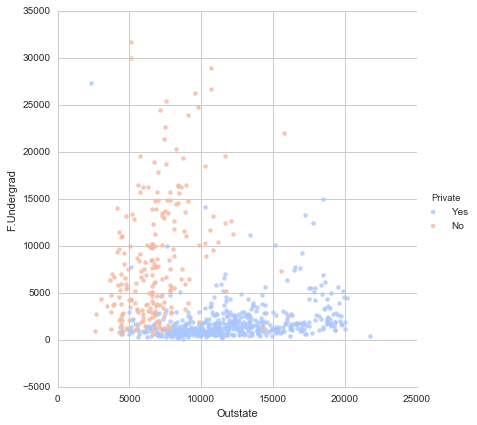

** Create a stacked histogram showing Out of State Tuition based on the Private column. Try doing this using [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html). If that is too tricky, see if you can do it just by using two instances of pandas.plot(kind='hist'). **

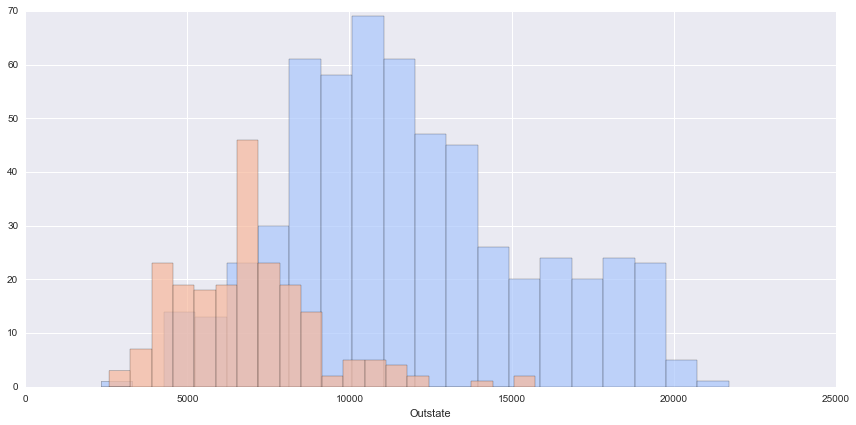

**Create a similar histogram for the Grad.Rate column.**

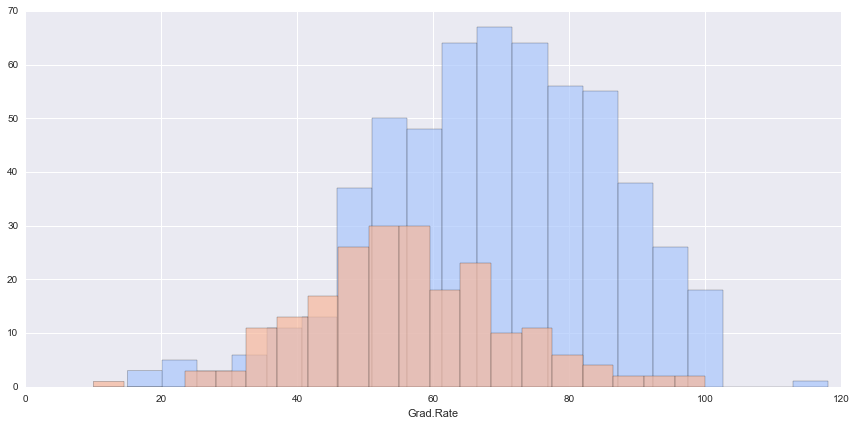

** Notice how there seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?**

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


** Set that school's graduation rate to 100 so it makes sense. You may get a warning not an error) when doing this operation, so use dataframe operations or just re-do the histogram visualization to make sure it actually went through.**

/Users/marci/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


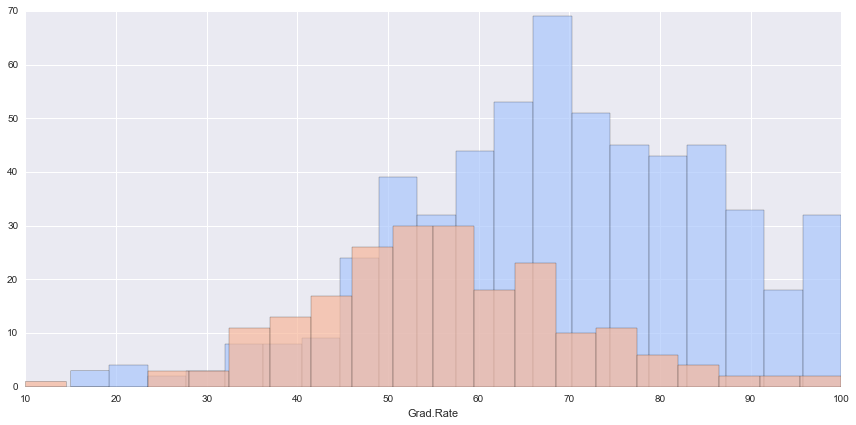

## K Means Cluster Creation

Now it is time to create the Cluster labels!

** Import KMeans from SciKit Learn.**

** Create an instance of a K Means model with 2 clusters.**

**Fit the model to all the data except for the Private label.**

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

** What are the cluster center vectors?**

array([[  1.81323468e+03,   1.28716592e+03,   4.91044843e+02,
          2.53094170e+01,   5.34708520e+01,   2.18854858e+03,
          5.95458894e+02,   1.03957085e+04,   4.31136472e+03,
          5.41982063e+02,   1.28033632e+03,   7.04424514e+01,
          7.78251121e+01,   1.40997010e+01,   2.31748879e+01,
          8.93204634e+03,   6.51195815e+01],
       [  1.03631389e+04,   6.55089815e+03,   2.56972222e+03,
          4.14907407e+01,   7.02037037e+01,   1.30619352e+04,
          2.46486111e+03,   1.07191759e+04,   4.64347222e+03,
          5.95212963e+02,   1.71420370e+03,   8.63981481e+01,
          9.13333333e+01,   1.40277778e+01,   2.00740741e+01,
          1.41705000e+04,   6.75925926e+01]])

## Evaluation

There is no perfect way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters, keep in mind, you usually won't have this luxury in the real world.

** Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


** Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

[[138  74]
 [531  34]]
             precision    recall  f1-score   support

          0       0.21      0.65      0.31       212
          1       0.31      0.06      0.10       565

avg / total       0.29      0.22      0.16       777



Not so bad considering the algorithm is purely using the features to cluster the universities into 2 distinct groups! Hopefully you can begin to see how K Means is useful for clustering un-labeled data!

## Great Job!